# Gradient Descent development

## AMHE

In [1]:
import nn_training.optimizers as optim
import nn_training.experiment_objectives as object_fun
import nn_training.neural_nets as n_nets
import nn_training.data_utils as dutils

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

%load_ext autoreload
%autoreload 2

In [2]:
dataset = dutils.UniformDistribution(1, -10, 10)

optimizer = optim.GradientDescent(
    optimized_func=object_fun.polynomial_func,    # in current experiment f(x) = x ** 2
    dataset=dataset,
)

In [3]:
experiment = optimizer.optimize(
    experiment_name="test",
    in_channels=1,
    n_hidden_neurons=10,
    out_channels=1,
    lr=1e-5,
    n_iters=100,
    probe_times=10_000,
    best_loss_treshold=1e-10,
)

Epoch 0 loss => 200.95431427589267
Epoch 1 loss => 84.31593322938474
Epoch 2 loss => 62.8038442624857
Epoch 3 loss => 46.75113355358167
Epoch 4 loss => 34.698093171340766
Epoch 5 loss => 26.487764399435513
Epoch 6 loss => 21.211026234128838
Epoch 7 loss => 16.370040713116317
Epoch 8 loss => 13.608691882977752
Epoch 9 loss => 11.49682594209376
Epoch 10 loss => 9.842142120811564
Epoch 11 loss => 8.527547085582162
Epoch 12 loss => 7.420370834357486
Epoch 13 loss => 6.617932959071442
Epoch 14 loss => 6.085142316966026
Epoch 15 loss => 5.4153960216299
Epoch 16 loss => 4.820839732071875
Epoch 17 loss => 4.304606733518393
Epoch 18 loss => 3.9617554038542644
Epoch 19 loss => 3.4064363936529176
Epoch 20 loss => 3.2102175075399693
Epoch 21 loss => 2.918262892641764
Epoch 22 loss => 2.590914084417278
Epoch 23 loss => 2.404343343849707
Epoch 24 loss => 2.273136039937143
Epoch 25 loss => 2.0481392313177182
Epoch 26 loss => 1.9799368939343986
Epoch 27 loss => 1.901158953653981
Epoch 28 loss => 1.851

In [4]:
f"Best model found after iteration = {experiment.best_individual_iteration}"

'Best model found after iteration = 98'

In [5]:
f"Best model loss = {experiment.best_individual_loss}"

'Best model loss = 0.891812522938363'

In [6]:
# Computes result for visualization
best_individual = experiment.best_individual

xs = []
y_true = []
y_preds = []

for _, x in zip(range(1000), dataset):
    xs.append(x)
    y_true.append(optimizer.optimized_func(x))
    y_preds.append(best_individual.predict(x))

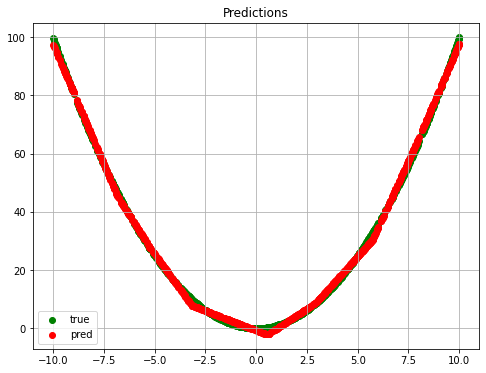

In [7]:
# Visualize results
plt.scatter(xs, y_true, color="g", label="true")
plt.scatter(xs, y_preds, color="r", label="pred")

plt.title("Predictions")
plt.legend()
plt.grid("on")

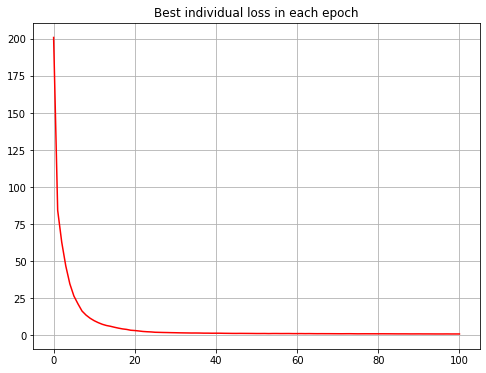

In [8]:
# Visualize loss function

plt.plot(range(len(experiment.losses_per_epoch)), experiment.losses_per_epoch, color="r")
plt.title("Best individual loss in each epoch")
plt.grid("on")